In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


### Definition: The bilateral filter is a Gaussian that acts strongly on regions of uniform color, and lightly on regions with high color variance. We can also name it as Fuzzy filter.

#### Let's compare just Gaussian Filter


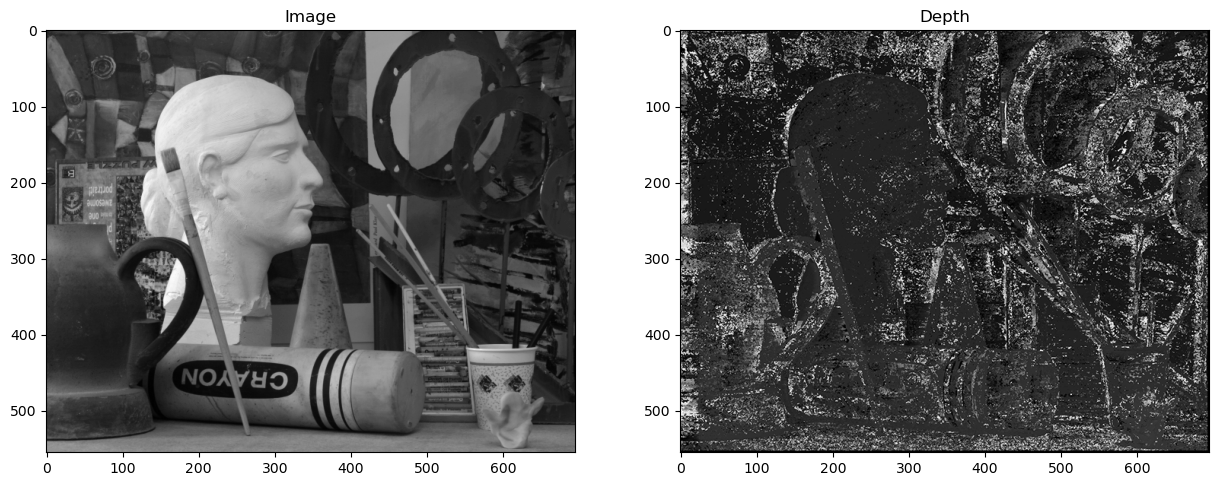

In [3]:
rgb2gray = lambda rgb: 0.2989 * rgb[:,:,0] + 0.5870 * rgb[:,:,1] + 0.1140 * rgb[:,:,2]


img = rgb2gray(mpimg.imread('files/view0.png'))
img_depth = (mpimg.imread('files/low_disparity_dynamic.png'))
img = cv2.resize(img, (img_depth.shape[1], img_depth.shape[0]))


fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(img, cmap=plt.get_cmap('gray'))
ax[0].set_title('Image')
ax[1].imshow(img_depth, cmap=plt.get_cmap('gray'))
ax[1].set_title('Depth')
plt.show()




### Gaussian Filter

In [3]:
from filters import *

In [4]:
#a,b,c = get_bilateral_output(img[:,:,0],2,8,5),get_bilateral_output(img[:,:,1],2,8,5), get_bilateral_output(img[:,:,2],2,8,5)

In [5]:
w_size = 5
#plt.imshow(get_bilateral_output(img, spec_sig=2, spat_sig=w_size / 2 * np.pi, window_size=w_size),
#           cmap=plt.get_cmap('gray'))

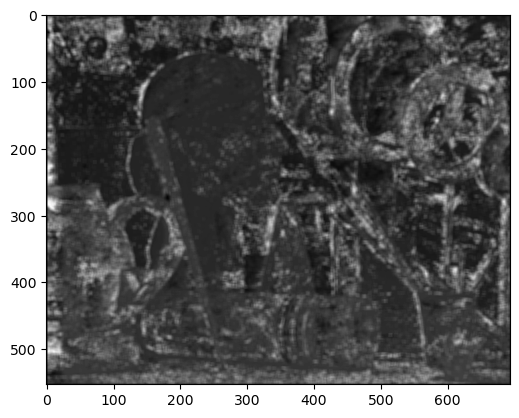

In [6]:
w_size = 5

plt.imshow(get_joint_bilateral_out(img,img_depth,w_size,spat_sigma=w_size / 2 * np.pi,spec_sigma=2),
           cmap=plt.get_cmap('gray'))
plt.show()

In [9]:
from upsampling import *


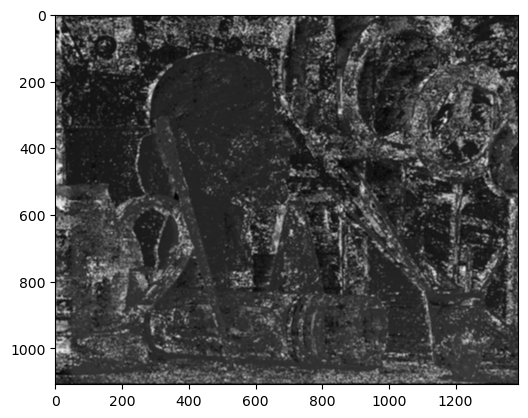

In [11]:
plt.imshow(get_joint_upsampling_out(img,img_depth,w_size,spat_sigma=w_size / 2 * np.pi,spec_sigma=2),
           cmap=plt.get_cmap('gray'))
plt.show()

### Let's apply Gaussian Filtering onto image

In [18]:
import PySimpleGUI as sg

# Define the layout
layout = [[sg.Text('3D Computer Vision', font='Helvetica 20 bold', text_color='black', background_color='white', pad=(10,10))],
          [sg.Text('Homework 2', font='Helvetica 14', text_color='black', background_color='white', pad=(10,10))],
          [sg.Button('Button 1', size=(20, 2), button_color=('white', 'black'), pad=(10,10)),
           sg.Button('Button 2', size=(20, 2), button_color=('white', 'black'), pad=(10,10)),
           sg.Button('Button 3', size=(20, 2), button_color=('white', 'black'), pad=(10,10))],
          [sg.Text('Tarlan Ahadli', justification='right', font='Helvetica 9', text_color='black', background_color='white', pad=(10,50))]]

# Create the window
main_window = sg.Window('3D Computer Vision Homework 2', layout, margins=(0, 200), size=(1000, 700), background_color='white', element_justification='center')

# Event loop
while True:
    event, values = main_window.read()

    if event in (sg.WIN_CLOSED, 'Button 1', 'Button 2', 'Button 3'):
        break

main_window.close()

In [14]:
import PySimpleGUI as sg
import cv2
import numpy as np
from PIL import Image,ImageTk

# Define the layout
layout = [[sg.Text('Select an image to add Gaussian noise')],
          [sg.Button('Choose Image'), sg.Image(filename='', key='clean_image', size = (100,100)), sg.Image(filename='', key='noisy_image', size = (100,100))],
          [sg.Slider(range=(0, 100), orientation='h', size=(20, 20), default_value=50, key='mean'),
           sg.Slider(range=(0, 100), orientation='h', size=(20, 20), default_value=50, key='std')],
          [sg.Button('Add Noise'), sg.Button('Reset')],
          [sg.Exit()]]

# Create the window
window = sg.Window('Image Noise GUI', layout)

# Event loop
while True:
    event, values = window.read()

    if event == 'Choose Image':
        # Open a file dialog and get the selected file's path
        file_path = sg.popup_get_file('Choose Image', file_types=(("JPEG", "*.jpg"), ("PNG", "*.png")))

        # Load the image using OpenCV
                # Load the image using OpenCV
        #image = cv2.imread(file_path)
        # Convert the image to a PhotoImage object
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = Image.open(file_path).convert('RGB')

        #image = sg.Image(data = image)

        # Update the GUI with the new image
        window['clean_image'].update(data=ImageTk.PhotoImage(image))
    elif event == 'Add Noise':
        # Get the current image
        image = window['clean_image'].get()

        # Convert the image to a NumPy array
        image = np.array(image)

        # Get the mean and standard deviation values from the sliders
        mean = values['mean']
        std = values['std']

        # Add Gaussian noise to the image
        image = image + np.random.normal(mean, std, image.shape)

        # Convert the image back to a PhotoImage object
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = sg.Image(data=image)

        # Update the GUI with the noisy image
        window['noisy_image'].update(image)
    elif event == 'Reset':
        # Reset the image to the original image
        image = cv2.imread(file_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = sg.Image(data=image)
        window['clean_image'].update(image)
        window['noisy_image'].update(sg.Image(filename=''))
    elif event == sg.WIN_CLOSED:
        break

window.close()

In [8]:
filter = get_gaussian_filter(2)
plt.imshow(np.stack((conv2d(img[:, :, 0], filter),
                     conv2d(img[:, :, 1], filter),
                     conv2d(img[:, :, 2], filter)),
                    axis=2))
plt.show()

NameError: name 'get_gaussian_filter' is not defined

In [13]:
import math
import datetime

# Constants for calculating prayer times
KAABA_LATITUDE = 21.4225
KAABA_LONGITUDE = 39.8262
ASR_SHADOW_FACTOR = 1
SUNRISE_ANGLE = 0.8333
SUNSET_ANGLE = 0.8333

def calculate_prayer_times(latitude, longitude):
    # Calculate the difference between the coordinates of the current location and the Kaaba
    latitude_difference = math.radians(KAABA_LATITUDE - latitude)
    longitude_difference = math.radians(KAABA_LONGITUDE - longitude)
    current_latitude = math.radians(latitude)
    kaaba_latitude = math.radians(KAABA_LATITUDE)

    # Calculate the prayer times using the differences and constants defined above
    fajr_time = (math.acos(math.sin(SUNRISE_ANGLE) - math.sin(current_latitude) * math.sin(kaaba_latitude) - math.cos(current_latitude) * math.cos(kaaba_latitude) * math.cos(longitude_difference)) / math.pi) * 12
    dhuhr_time = (math.acos(math.sin(SUNSET_ANGLE) - math.sin(current_latitude) * math.sin(kaaba_latitude) - math.cos(current_latitude) * math.cos(kaaba_latitude) * math.cos(longitude_difference)) / math.pi) * 12
    asr_time = dhuhr_time + ASR_SHADOW_FACTOR
    maghrib_time = dhuhr_time + (ASR_SHADOW_FACTOR / 2)
    isha_time = dhuhr_time + (ASR_SHADOW_FACTOR * 1.5)

    # Convert the prayer times from decimal hours to a human-readable time format (hh:mm)
    fajr_time_str = datetime.datetime.strftime(datetime.datetime.fromordinal(1).time() + datetime.timedelta(hours=fajr_time), '%H:%M')
    dhuhr_time_str = datetime.datetime.strftime(datetime.datetime.fromordinal(1).time() + datetime.timedelta(hours=dhuhr_time), '%H:%M')
    asr_time_str = datetime.datetime.strftime(datetime.datetime.fromordinal(1).time() + datetime.timedelta(hours=asr_time), '%H:%M')
    maghrib_time_str = datetime.datetime.strftime(datetime.datetime.fromordinal(1).time() + datetime.timedelta(hours=maghrib_time), '%H:%M')
    isha_time_str = datetime.datetime.strftime(datetime.datetime.fromordinal(1).time() + datetime.timedelta(hours=isha_time), '%H:%M')

    return {
        "fajr": fajr_time_str,
        "dhuhr": dhuhr_time_str,
        "asr": asr_time_str,
        "maghrib": maghrib_time_str,
        "isha": isha_time_str
    }
# Test the function with some sample coordinates
times = calculate_prayer_times(47.4979, 19.0402)
print(times)




TypeError: unsupported operand type(s) for +: 'datetime.time' and 'datetime.timedelta'

### Noise was removed, but edges are blurry too. We need edge-aware filtering

### Bilateral Filtering

In [ ]:
def bilateral_filtering(image, sig_s, sig_b):
    def bright_gaussian(k, sig):
        return np.exp(-0.5 * (k ** 2 / sig ** 2)) / (np.sqrt(2 * np.pi) * sig)

    gauss_kernel = get_gaussian_filter(sig_s)
    m, n = gauss_kernel.shape
    y, x = image.shape
    y = y - m + 1
    x = x - m + 1
    new_image = np.zeros((y, x))
    for i in range(y):
        for j in range(x):
            s = 0
            wsb = 0
            for k in range(m):
                for l in range(n):
                    ws = gauss_kernel[k, l]
                    wb = bright_gaussian(image[i + k, j + l] - image[i, j], sig_b)
                    wsb += ws * wb
                    s += image[i + k, j + l] * ws * wb
            new_image[i][j] = s / wsb
    return new_image

In [ ]:
sig_s = 2
sig_b = 5

bilateral_img = np.stack((bilateral_filtering(img[:, :, 0], sig_s, sig_b),
                          bilateral_filtering(img[:, :, 1], sig_s, sig_b),
                          bilateral_filtering(img[:, :, 2], sig_s, sig_b)),
                         axis=2)

fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(img)
ax[0].set_title('Original')
ax[1].imshow(bilateral_img)
ax[1].set_title('Bilateral Filtering')
plt.show()

### Guided Filter

In [ ]:
def guided_filter(p, I, r, e):
    kernel = np.ones((r, r)) / (r ** 2)
    pad = r // 2

    mean_p = conv2d(np.pad(p, pad), kernel)
    mean_I = conv2d(np.pad(I, pad), kernel)
    corr_I = conv2d(np.pad(I * I, pad), kernel)
    corr_Ip = conv2d(np.pad(I * p, pad), kernel)

    var_I = corr_I - mean_I * mean_I
    cov_Ip = corr_Ip - mean_I * mean_p

    a = cov_Ip / (var_I + e)
    b = mean_p - a * mean_I

    mean_a = conv2d(np.pad(a, pad), kernel)
    mean_b = conv2d(np.pad(b, pad), kernel)

    q = mean_a * I + mean_b

    return q

In [ ]:
r = 17
e = 0.01

guided_img = np.stack((guided_filter(img[:, :, 0], img[:, :, 0], r, e),
                       guided_filter(img[:, :, 1], img[:, :, 1], r, e),
                       guided_filter(img[:, :, 2], img[:, :, 2], r, e),),
                      axis=2)

fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(img)
ax[0].set_title('Original')
ax[1].imshow(guided_img)
ax[1].set_title('Guided Filtering')
plt.show()

In [ ]:
img_s = mpimg.imread('files/rubic_s.png')
img_s = cv2.resize(img_s, (img.shape[1], img.shape[0]))

r = 17
e = 0.01

guided_img_s = np.stack((guided_filter(img_s[:, :, 0], img[:, :, 0], r, e),
                         guided_filter(img_s[:, :, 1], img[:, :, 1], r, e),
                         guided_filter(img_s[:, :, 2], img[:, :, 2], r, e),),
                        axis=2)

fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(img_s)
ax[0].set_title('Original')
ax[1].imshow(guided_img_s)
ax[1].set_title('Upsampled Filtered')
plt.show()

In [ ]:
resized_image = cv2.resize(img, (img.shape[1] // 8, img.shape[0] // 8))
resized_image = cv2.cvtColor(resized_image, cv2.COLOR_RGB2BGR)
cv2.imwrite('files/rubic_s.png', ((resized_image / resized_image.max()) * 255).astype(int))


In [ ]:
img_s